In [ ]:
# Dataset source: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


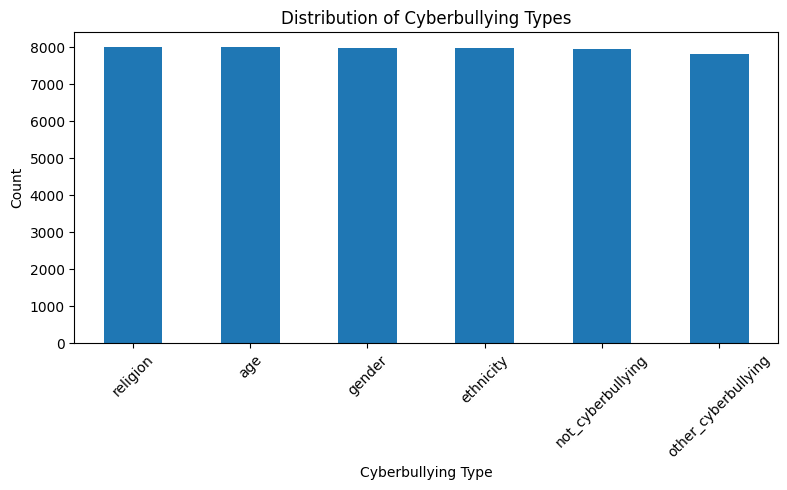

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cyberbullying.csv')

# Display basic info
print("First few rows of the dataset:")
print(df.head())

# Count of each cyberbullying type
counts = df['cyberbullying_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Generating word cloud for label: age


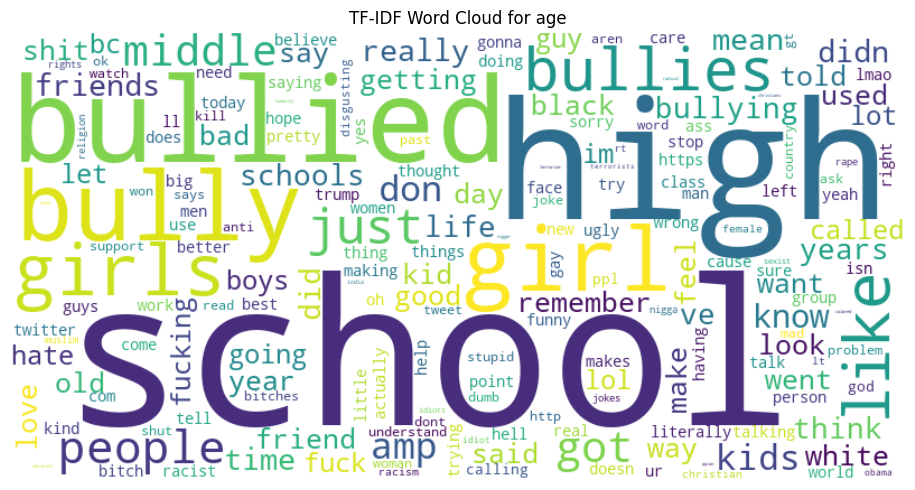

Generating word cloud for label: ethnicity


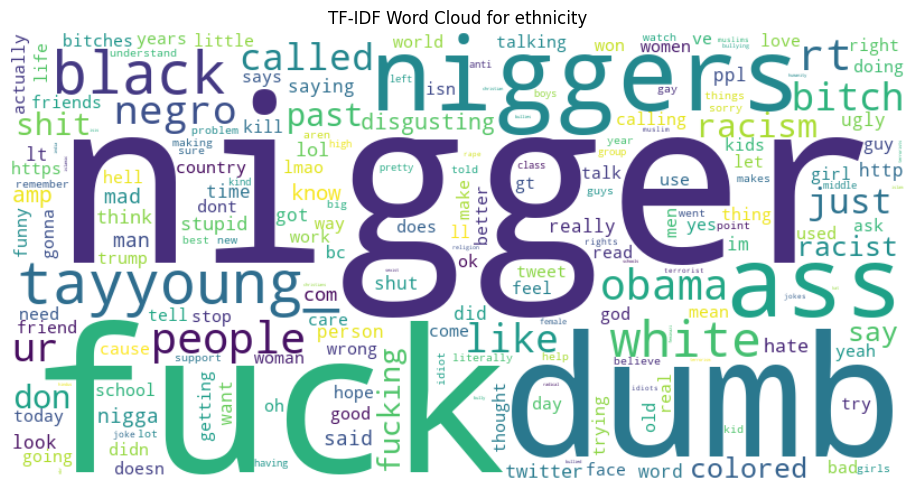

Generating word cloud for label: gender


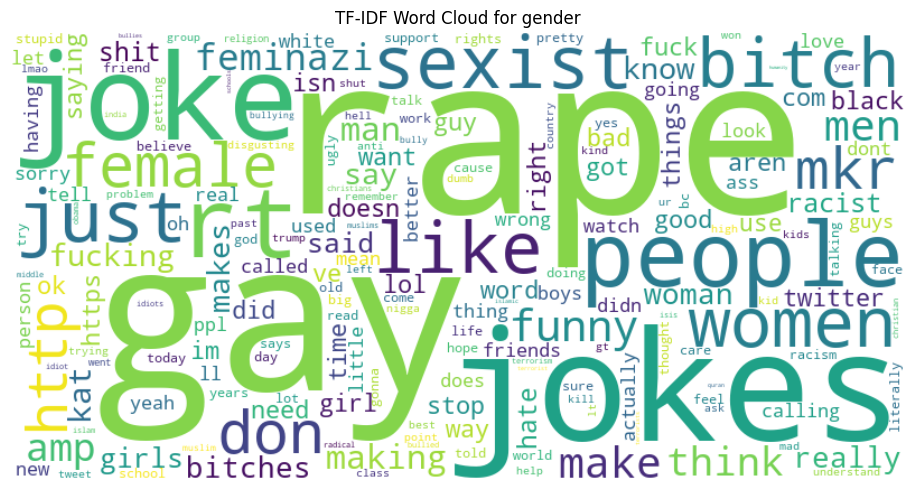

Generating word cloud for label: not_cyberbullying


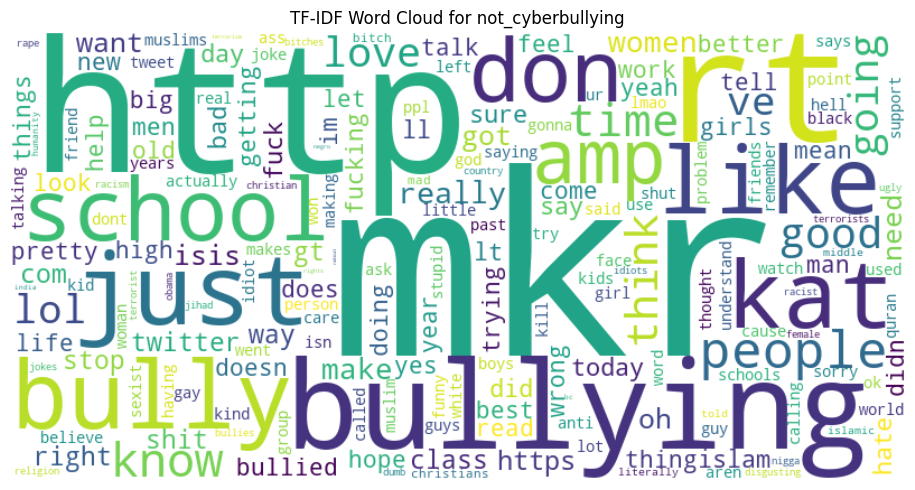

Generating word cloud for label: other_cyberbullying


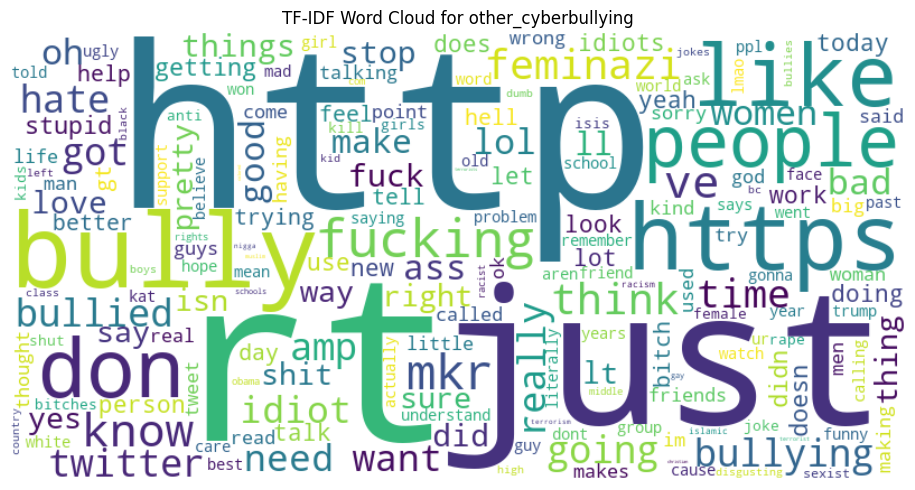

Generating word cloud for label: religion


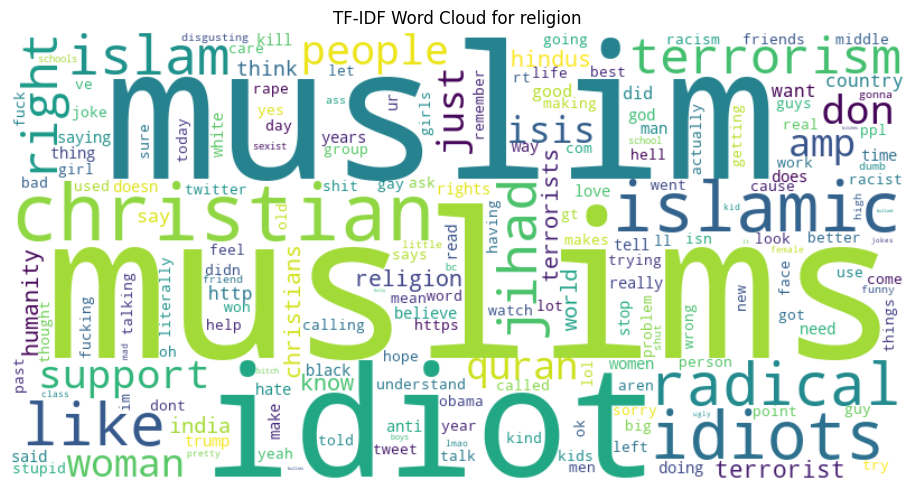

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Load the CSV
df = pd.read_csv('cyberbullying.csv')

# Fill missing text (if any)
df['tweet_text'] = df['tweet_text'].fillna('')

# Group by cyberbullying_type
grouped = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda texts: ' '.join(texts))

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_matrix = vectorizer.fit_transform(grouped)

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out(), columns=grouped.index)

# Plot WordClouds
for label in tfidf_df.columns:
    print(f"Generating word cloud for label: {label}")
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    freqs = tfidf_df[label].to_dict()
    wordcloud.generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'TF-IDF Word Cloud for {label}')
    plt.tight_layout()
    plt.show()
